<a href="https://colab.research.google.com/github/KaushalDuggar/ML-101/blob/main/FaceRecognition(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!sudo mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!sudo add-apt-repository "deb https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/ /"
!sudo apt-get update
!sudo apt-get -y install cuda-10-1
!sudo apt-get -y install libcudnn7 libcudnn7-dev

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install dlib

In [ ]:
from imutils import paths
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os

In [ ]:
import os

imagePaths = []
folder_path = '/content/drive/My Drive/Newdata'
main_dir_list = os.listdir(folder_path)

for name in main_dir_list:
    name_dir = os.path.join(folder_path, name)


    imagePaths.append(name_dir)

print(imagePaths)

['/content/drive/My Drive/Newdata/Bhavya(1).JPG', '/content/drive/My Drive/Newdata/Bhavya.JPG', '/content/drive/My Drive/Newdata/Zareb.JPG', '/content/drive/My Drive/Newdata/aaryan.JPG', '/content/drive/My Drive/Newdata/kaushal (2).jpg', '/content/drive/My Drive/Newdata/kaushal (1).jpg', '/content/drive/My Drive/Newdata/kaushal.JPG', '/content/drive/My Drive/Newdata/yash.JPG', '/content/drive/My Drive/Newdata/abhay.JPG']


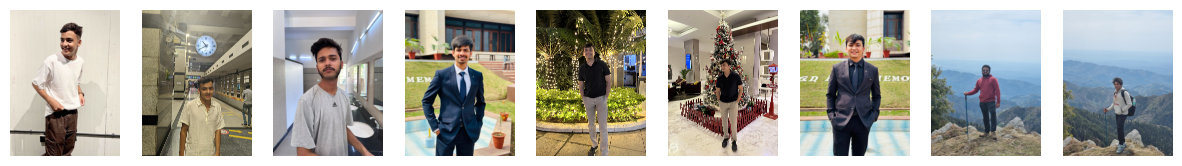

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
num_images = len(imagePaths)

# Create subplots
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Plot each image in a subplot
for i, imagePath in enumerate(imagePaths):
    img = mpimg.imread(imagePath)
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes

# Show the plot
plt.show()

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=019c2590539fc8c0cc6a8c0654de1e5637f4fb06621394bfb30cba894f3a2a79
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.version.cuda)

True
12.1


In [ ]:
!pip install pyheif pillow

In [ ]:
# import os
# import pyheif
# from PIL import Image

# def convert_heic_to_jpg(image_path):
#     heif_file = pyheif.read(image_path)
#     image = Image.frombytes(
#         heif_file.mode,
#         heif_file.size,
#         heif_file.data,
#         "raw",
#         heif_file.mode,
#         heif_file.stride,
#     )
#     new_image_path = image_path.replace(".HEIC", ".jpg")
#     image.save(new_image_path, "JPEG")
#     return new_image_path

# # Convert all .HEIC images in the dataset
# converted_image_paths = []
# for image_path in imagePaths:
#     if image_path.lower().endswith(".heic"):
#         new_image_path = convert_heic_to_jpg(image_path)
#         converted_image_paths.append(new_image_path)
#     else:
#         converted_image_paths.append(image_path)

In [ ]:
# print(converted_image_paths)

['/content/drive/My Drive/Newdata/Zareb.JPG', '/content/drive/My Drive/Newdata/Bhavya.JPG', '/content/drive/My Drive/Newdata/kaushal (2).jpg', '/content/drive/My Drive/Newdata/kaushal.jpg', '/content/drive/My Drive/Newdata/kaushal (1).jpg', '/content/drive/My Drive/Newdata/Bhavya (1).JPG', '/content/drive/My Drive/Newdata/prabhat.jpg', '/content/drive/My Drive/Newdata/aaryan.JPG']


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [ ]:

import face_recognition

# Function to extract face embeddings
def extract_face_embeddings(imagePaths):
    embeddings = []
    for imagePath in imagePaths:
        # Load the image
        image = face_recognition.load_image_file(imagePath)

        # Find all face locations in the image
        face_locations = face_recognition.face_locations(image)

        # Compute the face embeddings for each face
        face_encodings = face_recognition.face_encodings(image, face_locations)

        # Append only the first embedding to the list
        if face_encodings:
            embeddings.append(face_encodings[0])

    return embeddings

# Extract embeddings
face_embeddings = extract_face_embeddings(imagePaths)

# Print the shape of the first embedding
if face_embeddings:
    print("Shape of face embedding:", len(face_embeddings[0]))

# Example: Print the first embedding
if face_embeddings:
    print("First face embedding:", face_embeddings[0])

Shape of face embedding: 128
First face embedding: [-0.04117066  0.08562762  0.02740495 -0.02544404 -0.09557576  0.0834696
  0.00986841 -0.06894255  0.17303252 -0.09406008  0.15323079 -0.09221615
 -0.1910678  -0.03243798  0.00063513  0.11500013 -0.08245523 -0.20334426
 -0.11036752 -0.03579286  0.01949952 -0.01401963 -0.05747771  0.04210739
 -0.16592418 -0.36516464 -0.04575274 -0.12308313  0.03871989 -0.05151652
 -0.01362268  0.05769127 -0.18461213 -0.06078398 -0.00756048  0.02831068
 -0.09769878 -0.01794036  0.22750495  0.03460947 -0.16076289  0.11429459
 -0.02423002  0.34016329  0.16259691  0.10764498  0.07786504 -0.07248062
  0.08493494 -0.32639083  0.10446469  0.13906717  0.04170131  0.07563877
  0.11396301 -0.1696531   0.00450093  0.0104187  -0.22565576  0.16974254
  0.03209637 -0.02315518  0.01256241 -0.08445317  0.28352398  0.09461419
 -0.06058283 -0.10511695  0.17216064 -0.14713559 -0.01096203  0.06762483
 -0.08522125 -0.18919286 -0.26742133  0.09818685  0.49052775  0.1880694
 -

In [ ]:
len(face_embeddings)

9

['/content/drive/My Drive/Suspect/1000020915.JPG']


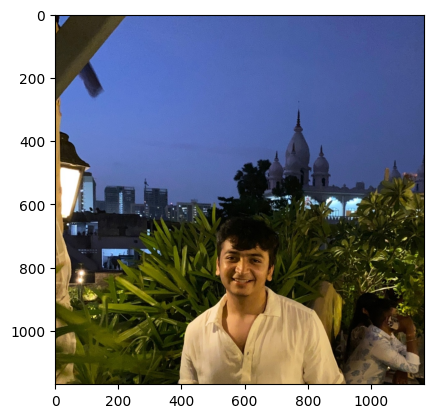

In [ ]:
sus_imagePaths = []
folder_path = '/content/drive/My Drive/Suspect'
main_dir_list = os.listdir(folder_path)

for name in main_dir_list:
    name_dir = os.path.join(folder_path, name)


    sus_imagePaths.append(name_dir)

print(sus_imagePaths)
img = mpimg.imread(sus_imagePaths[0])
plt.imshow(img)
axes[i].axis('off')  # Hide axes

# Show the plot
plt.show()

In [ ]:
sus_face_embeddings = extract_face_embeddings(sus_imagePaths)

# Print the shape of the first embedding
if sus_face_embeddings:
    print("Shape of face embedding:", len(sus_face_embeddings[0]))

Shape of face embedding: 128


First approach on the basis of Euclidean distance

Found 2 matches:
Match 4 with distance 0.4332171831470302
/content/drive/My Drive/Newdata/kaushal (2).jpg
Match 6 with distance 0.441957953407539
/content/drive/My Drive/Newdata/kaushal.JPG


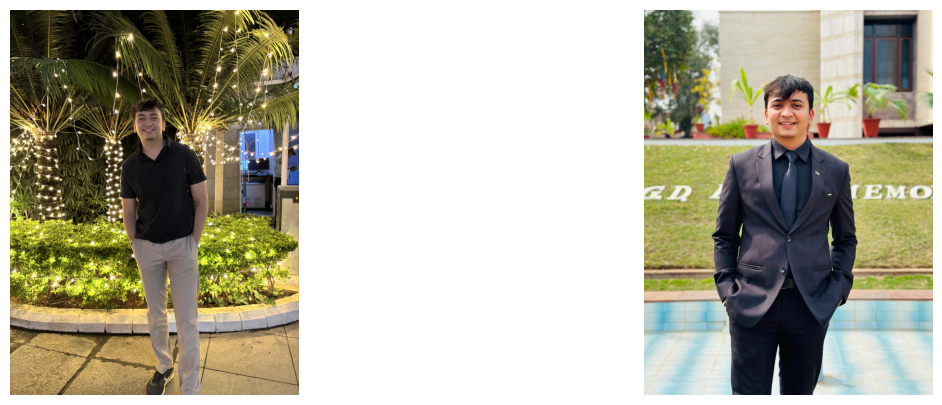

In [ ]:
import numpy as np

# Example embeddings
sus_face_embedding = sus_face_embeddings[0]
threshold = 0.5  #show with threshold as 0.5 for different anlgle

def find_match(sus_embedding, dataset_embeddings, threshold):
    matches = []
    for idx, embedding in enumerate(dataset_embeddings):
        # print(idx)
        distance = np.linalg.norm(sus_embedding - embedding)
        if distance < threshold:
            matches.append((idx, distance))
    return matches

# Find matches
matches = find_match(sus_face_embedding, face_embeddings, threshold)

# Print results
if matches:
    print(f"Found {len(matches)} matches:")
    for idx, distance in matches:
        print(f"Match {idx} with distance {distance}")
        print(imagePaths[idx])
else:
    print("No matches found.")

num_matches = len(matches)
fig, axes = plt.subplots(1, num_matches, figsize=(15, 5))

for i, (idx, distance) in enumerate(matches):
    img = mpimg.imread(imagePaths[idx])
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes

plt.show()

Approach @ 2 on the basis of cosine similarity

In [ ]:
def calculate_similarity(face1, face2):
    face1 = np.array(face1)
    face2 = np.array(face2)
    return np.dot(face1, face2) / (np.linalg.norm(face1) * np.linalg.norm(face2))

In [ ]:
# Iterate through embeddings and print image addresses with similarity > 0.9
for idx, embedding in enumerate(face_embeddings):
    perc = calculate_similarity(sus_face_embedding, embedding)
    if perc > 0.9:  #show for confidence  with 0.95
        print(f"Image: {imagePaths[idx]}, Similarity: {perc}")

Image: /content/drive/My Drive/Newdata/kaushal (2).jpg, Similarity: 0.9522849544959453
Image: /content/drive/My Drive/Newdata/kaushal (1).jpg, Similarity: 0.9362956779425466
Image: /content/drive/My Drive/Newdata/kaushal.JPG, Similarity: 0.9516094621469127


\Run_2 What happens if there are no matches in the dataset

['/content/drive/My Drive/Sus_grp/ishan.jpg']


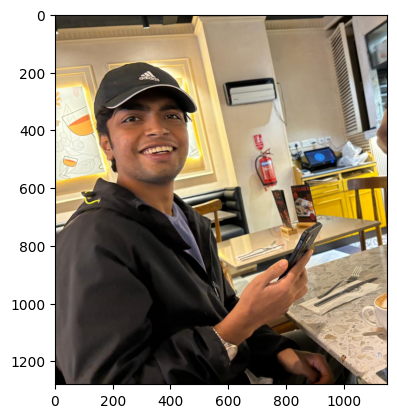

In [ ]:
sus_imagePaths = []
folder_path = '/content/drive/My Drive/Sus_grp'
main_dir_list = os.listdir(folder_path)

for name in main_dir_list:
    name_dir = os.path.join(folder_path, name)


    sus_imagePaths.append(name_dir)

print(sus_imagePaths)
img = mpimg.imread(sus_imagePaths[0])
plt.imshow(img)
axes[i].axis('off')  # Hide axes

# Show the plot
plt.show()

In [ ]:
def extract_face_embeddings(imagePaths):
    embeddings = []
    for imagePath in imagePaths:
        # Load the image
        image = face_recognition.load_image_file(imagePath)

        # Find all face locations in the image
        face_locations = face_recognition.face_locations(image)

        # Compute the face embeddings for each face
        face_encodings = face_recognition.face_encodings(image, face_locations)

        # Append all embeddings to the list
        embeddings.extend(face_encodings)

    return embeddings

face_embeddings_1 = extract_face_embeddings(sus_imagePaths)

# Print the number of embeddings found
print(f"Number of face embeddings found: {len(face_embeddings_1)}")

# Example: Print the first embedding
if face_embeddings_1:
    print("First face embedding:", face_embeddings_1[0])

Number of face embeddings found: 1
First face embedding: [-0.25276864  0.10236419 -0.00585089 -0.05519713 -0.06971224 -0.04337803
 -0.02873678 -0.04268515  0.14995289 -0.06426124  0.14902622 -0.06874999
 -0.22669509 -0.11460616 -0.0481667   0.11015384 -0.24098215 -0.14633673
 -0.00963194 -0.03841937  0.08002874 -0.00518112  0.03411956  0.0974671
 -0.16809177 -0.35926038 -0.06416876 -0.19216397  0.01373697 -0.0658628
  0.02443425  0.01932166 -0.22399223 -0.06430955 -0.04171338  0.10958313
  0.03328805  0.06100546  0.19597018 -0.02602959 -0.12464634 -0.07258563
 -0.03605658  0.3321386   0.13332391  0.07119011  0.03798062 -0.00704657
  0.05144567 -0.19567157  0.0527373   0.1596801   0.095953    0.01603978
  0.03873688 -0.13306177  0.03524539  0.15596333 -0.1690329   0.05376174
  0.00583386 -0.03256371  0.0093516   0.01948611  0.36273724  0.01797277
 -0.13495453 -0.0608773   0.19746473 -0.08966432  0.00178229  0.05093947
 -0.1248102  -0.16673037 -0.2890414   0.06328957  0.40456933  0.09098

In [ ]:
matches = find_match(face_embeddings_1[0], face_embeddings, threshold)

# Print results
if matches:
    print(f"Found {len(matches)} matches:")
    for idx, distance in matches:
        print(f"Match {idx} with distance {distance}")
        print(imagePaths[idx])
else:
    print("No matches found.")

num_matches = len(matches)
fig, axes = plt.subplots(1, num_matches, figsize=(15, 5))

for i, (idx, distance) in enumerate(matches):
    img = mpimg.imread(imagePaths[idx])
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes

plt.show()

No matches found.


ValueError: Number of columns must be a positive integer, not 0

<Figure size 1500x500 with 0 Axes>

In [ ]:
for idx, embedding in enumerate(face_embeddings):
    perc = calculate_similarity(face_embeddings_1, embedding)
    if perc > 0.95:
        print(f"Image: {imagePaths[idx]}, Similarity: {perc}")